# Session 9 - Locality Sensitive Hashing

In this sesion we will play with locality sensitive hashing for retrieving the closer image from a dataset of images to a given one.

The dataset consists of handwritten digits [0..9]. Each one is represented as a matrix of greyscale pixels.

In [43]:
import numpy as np
from lsh import lsh
import time

data = np.load('images.npy')
data[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

We can also plot them as images

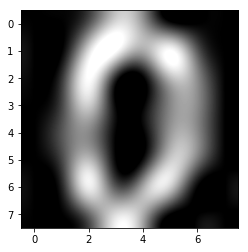

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(data[0], cmap=plt.cm.gray, interpolation="lanczos")

You have available the implementation of a class that computes LSH for this images in the file ```lsh.py```.

As an ilustration, the next cell shows an example of how to retrieve similar images to a given one using LSH for this dataset. 

Function ```search``` has three parameters, $k$ is the number of bytes used in the hash function, $m$ is the number of hash functions used to index the images, $i$ is the number of the image to use for the search.

You can observe the time taken to retrieve the candidate images and the number of candidates as $k$ and $m$ change.

The cell also shows the original image and the first of the candidate images (it does not have to be the closest one).

Your can play a little bit with the parameters. 

Your **next task** is to read the documentation for the session and understand how the ```lsh``` class works. After that you can complete the tasks from section 4 in the documentation.

## Task 1

### T 1.1

In [49]:
max_k = 20
max_m = 10
x = [i for i in range(1,max_k*max_m+1)]
y = [[] for _ in range(max_k*max_m)]
for k in range(1,max_k+1):
    for m in range(1,max_m+1):
        start_time= time.time()
        me = lsh(k, m)

        # show candidate neighbors for first 10 test images
        for r in range(1500, 1510):
            im = me.data[r]
            cands = me.candidates(im)
        y[k*m-1].append(time.time() - start_time)
    print(k)

for i,l in enumerate(y):
    if len(l) == 0:
        y[i] = None
    else:
        y[i] = sum(l)/len(l)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


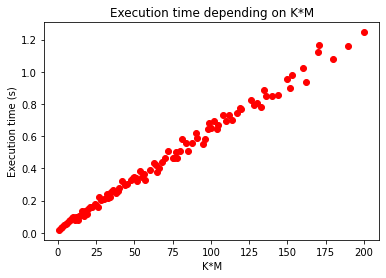

In [50]:
plt.plot(x,y, 'ro')
plt.xlabel('K*M')
plt.ylabel('Execution time (s)')
plt.title("Execution time depending on K*M")
plt.show()

In [51]:
max_k = 30
x = [i for i in range(1,max_k+1)]
y = [[] for i in range(max_k)]
for k in range(1,max_k+1):
    start_time= time.time()
    me = lsh(k, 10)
    # show candidate neighbors for first 10 test images
    for r in range(1500, 1510):
        im = me.data[r]
        cands = me.candidates(im)
        y[k-1].append(len(cands))
    print(k)

for i,l in enumerate(y):
    y[i] = sum(l)/len(l)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


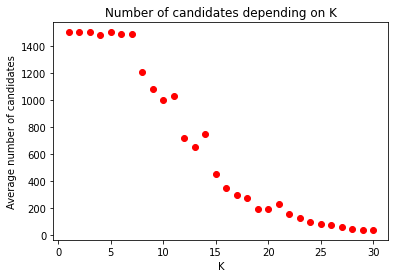

In [52]:
plt.plot(x,y, 'ro')
plt.xlabel('K')
plt.ylabel('Average number of candidates')
plt.title("Number of candidates depending on K")
plt.show()

In [53]:
max_m = 30
x = [i for i in range(1,max_m+1)]
y2 = [[] for i in range(max_m)]
for m in range(1,max_m+1):
    start_time= time.time()
    me = lsh(10, m)
    # show candidate neighbors for first 10 test images
    for r in range(1500, 1510):
        im = me.data[r]
        cands = me.candidates(im)
        y2[m-1].append(len(cands))
    print(m)

for i,l in enumerate(y2):
    y2[i] = sum(l)/len(l)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


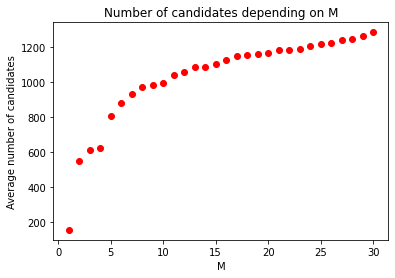

In [54]:
plt.plot(x,y2, 'ro')
plt.xlabel('M')
plt.ylabel('Average number of candidates')
plt.title("Number of candidates depending on M")
plt.show()

In [55]:
def function(n,k,m,s):
    return n*(1-(1-s**k)**m)
s = 0.8
y_k = [function(1500,k,10,s) for k in x]
y_m = [function(1500,10,m,s) for m in x]
    

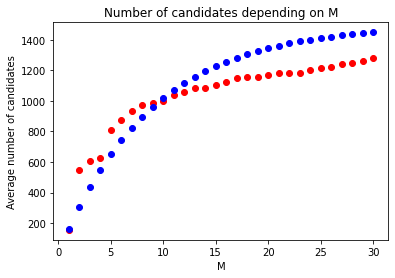

In [57]:
plt.plot(x,y2,'ro',x,y_m,'bo')
plt.xlabel('M')
plt.ylabel('Average number of candidates')
plt.title("Number of candidates depending on M")
plt.show()

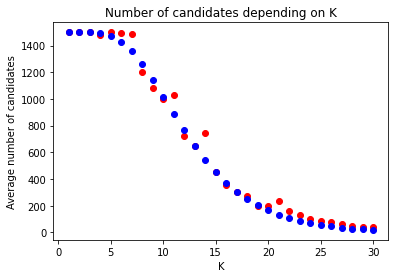

In [58]:
plt.plot(x,y,'ro',x,y_k,'bo')
plt.xlabel('K')
plt.ylabel('Average number of candidates')
plt.title("Number of candidates depending on K")
plt.show()

## Task 2

In [57]:
def plot_two_images(a,b,data):
    fig = plt.figure()
    fig.set_figwidth(10)
    fig.set_figheight(10)
    sp1 = fig.add_subplot(1,2,1)
    sp1.imshow(data[a], cmap=plt.cm.gray, interpolation="lanczos")
    sp1 = fig.add_subplot(1,2,2)
    sp1.imshow(data[b], cmap=plt.cm.gray, interpolation="lanczos")
    plt.show()

def search(me,i,data):
    """
    Returns a list of candidates for image i using k bits and m hash funcions
    """
    if i + 1500 < data.shape[0]:
        print(i+1500)
        im = me.data[i+1500]
        cands = me.candidates(im)
        print ("there are %4d candidates for image %4d" % (len(cands), i))
        if len(cands) != 0:
            dist = np.sum(np.abs(data[i+1500]-data[list(cands)[0]]))
            print("Hamming dist=", dist)
            return list(cands)[0], dist
    return None,0
        
#Our code:

'''
Computes the L1 distance between two given images.
'''
def distance(a,b):
    dist = 0
    dims = a.shape
    for i in range(dims[0]):
        for j in range(dims[1]):
            dist += abs(a[i][j] - b[i][j])
    return dist

'''
Retrieves the closest image from a given one by using a brute force algorithm
'''
def brute_force_closest(im_id,data):
    im_id+=1500
    print(im_id)
    id = 0
    min_dist = distance(data[im_id],data[0])
    for i in range(1,1500):
        im_dist = distance(data[im_id],data[i])
        if im_dist < min_dist:
            id = i
            min_dist = im_dist
    print('Hamming dist=',min_dist)
    return id,min_dist

1501
there are   69 candidates for image    1
Hamming dist= 204.0
CPU times: user 769 µs, sys: 0 ns, total: 769 µs
Wall time: 708 µs


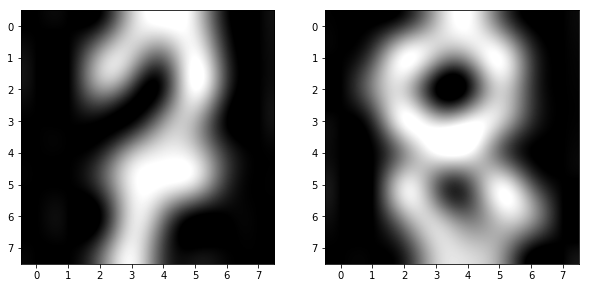

1501
Hamming dist= 56.0
CPU times: user 93.9 ms, sys: 0 ns, total: 93.9 ms
Wall time: 94.9 ms


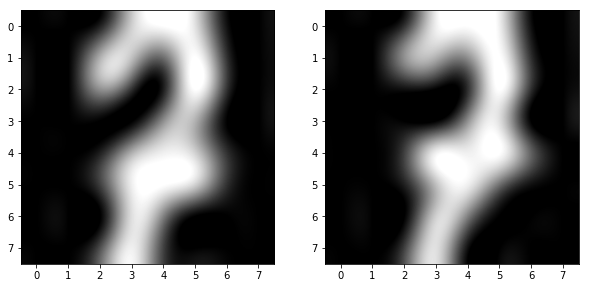

In [54]:
i=1 # The number of image to do the search
me = lsh(20,5)

%time im_id_lsh,dist = search(me,i,data)

plot_two_images(i+1500,im_id_lsh,data)

%time im_id,dist = brute_force_closest(i,data)

plot_two_images(i+1500,im_id,data)


1501
there are  230 candidates for image    1
Hamming dist= 174.0
CPU times: user 1.18 ms, sys: 0 ns, total: 1.18 ms
Wall time: 1.06 ms


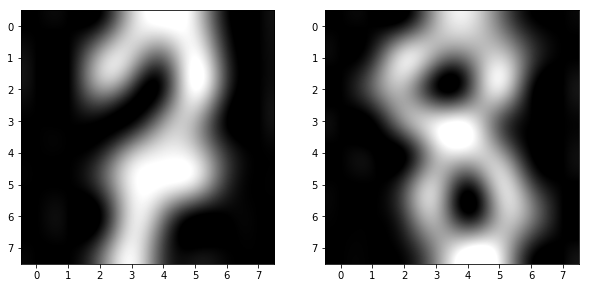

1501
Hamming dist= 56.0
CPU times: user 110 ms, sys: 0 ns, total: 110 ms
Wall time: 112 ms


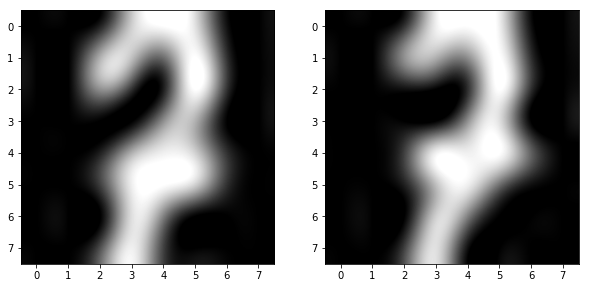

In [53]:
i=1 # The number of image to do the search
me = lsh(20,15)

%time im_id_lsh,dist = search(me,i,data)

plot_two_images(i+1500,im_id_lsh,data)

%time im_id,dist = brute_force_closest(i,data)

plot_two_images(i+1500,im_id,data)

1501
there are    7 candidates for image    1
Hamming dist= 85.0
CPU times: user 1.14 ms, sys: 27 µs, total: 1.16 ms
Wall time: 1.08 ms


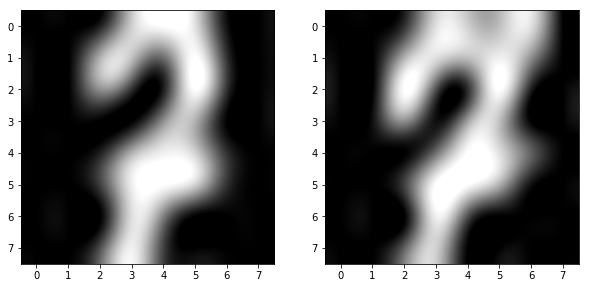

1501
Hamming dist= 56.0
CPU times: user 115 ms, sys: 0 ns, total: 115 ms
Wall time: 116 ms


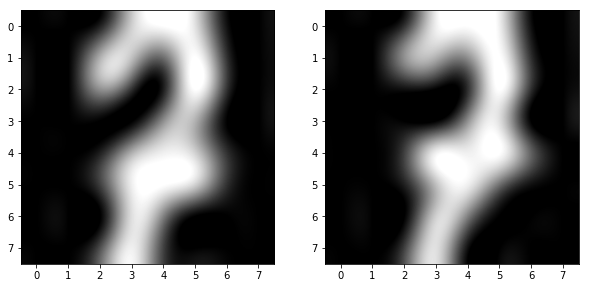

In [52]:
i=1 # The number of image to do the search
me = lsh(40,5)

%time im_id_lsh,dist = search(me,i,data)

plot_two_images(i+1500,im_id_lsh,data)

%time im_id,dist = brute_force_closest(i,data)

plot_two_images(i+1500,im_id,data)

1501
there are    8 candidates for image    1
Hamming dist= 78.0
CPU times: user 2.12 ms, sys: 49 µs, total: 2.17 ms
Wall time: 2.02 ms


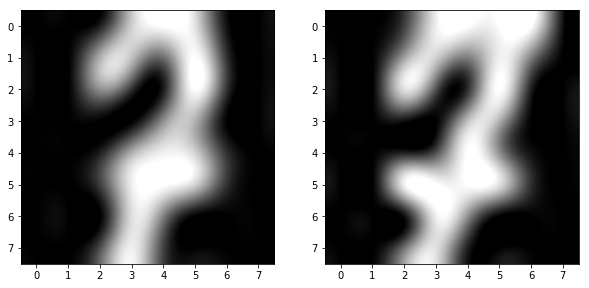

1501
Hamming dist= 56.0
CPU times: user 78.1 ms, sys: 0 ns, total: 78.1 ms
Wall time: 80.5 ms


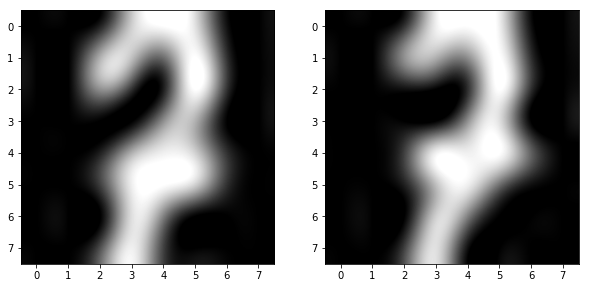

In [51]:
i=1 # The number of image to do the search
me = lsh(40,15)

%time im_id_lsh,dist = search(me,i,data)

plot_two_images(i+1500,im_id_lsh,data)

%time im_id,dist = brute_force_closest(i,data)

plot_two_images(i+1500,im_id,data)

In [58]:
values = [1,5,10,20,50]
dict_lsh = {}
dict_b = {}
for k in values:
    for m in values:
        start_lsh = time.time()
        me = lsh(k,m)
        finish_lsh = time.time()
        total_time_lsh = 0
        total_distance_lsh = 0
        total_time_b = 0
        total_distance_b = 0
        quantity = 10
        for i in range(quantity):
            #lsh:
            start_search_lsh = time.time()
            id_lsh,dist_lsh = search(me,i,data)
            if id_lsh is None: quantity-=1
            else:
                finish_search_lsh = time.time()
                total_time_lsh += (finish_search_lsh-start_search_lsh)
                total_distance_lsh += dist_lsh
            #brute_force:
            start_search_b = time.time()
            _,dist_b = brute_force_closest(i,data)
            finish_search_b = time.time()
            total_time_b += (finish_search_b-start_search_b)
            total_distance_b += dist_b
        if quantity != 0:
            dict_lsh[(k,m)] = [finish_lsh - start_lsh,total_time_lsh/10,total_distance_lsh/10]
        dict_b[(k,m)] = [total_time_b/10,total_distance_b/10]

1500
there are 1001 candidates for image    0
Hamming dist= 222.0
1500
Hamming dist= 52.0
1501
there are 1001 candidates for image    1
Hamming dist= 228.0
1501
Hamming dist= 56.0
1502
there are  499 candidates for image    2
Hamming dist= 242.0
1502
Hamming dist= 60.0
1503
there are 1001 candidates for image    3
Hamming dist= 272.0
1503
Hamming dist= 64.0
1504
there are 1001 candidates for image    4
Hamming dist= 226.0
1504
Hamming dist= 57.0
1505
there are 1001 candidates for image    5
Hamming dist= 211.0
1505
Hamming dist= 30.0
1506
there are 1001 candidates for image    6
Hamming dist= 275.0
1506
Hamming dist= 64.0
1507
there are  499 candidates for image    7
Hamming dist= 156.0
1507
Hamming dist= 45.0
1508
there are 1001 candidates for image    8
Hamming dist= 266.0
1508
Hamming dist= 52.0
1509
there are  499 candidates for image    9
Hamming dist= 232.0
1509
Hamming dist= 40.0
1500
there are 1500 candidates for image    0
Hamming dist= 271.0
1500
Hamming dist= 52.0
1501
there

Hamming dist= 56.0
1502
there are 1500 candidates for image    2
Hamming dist= 242.0
1502
Hamming dist= 60.0
1503
there are 1500 candidates for image    3
Hamming dist= 243.0
1503
Hamming dist= 64.0
1504
there are 1500 candidates for image    4
Hamming dist= 265.0
1504
Hamming dist= 57.0
1505
there are 1500 candidates for image    5
Hamming dist= 324.0
1505
Hamming dist= 30.0
1506
there are 1500 candidates for image    6
Hamming dist= 224.0
1506
Hamming dist= 64.0
1507
there are 1500 candidates for image    7
Hamming dist= 156.0
1507
Hamming dist= 45.0
1508
there are 1500 candidates for image    8
Hamming dist= 283.0
1508
Hamming dist= 52.0
1509
there are 1500 candidates for image    9
Hamming dist= 232.0
1509
Hamming dist= 40.0
1500
there are  212 candidates for image    0
Hamming dist= 236.0
1500
Hamming dist= 52.0
1501
there are  100 candidates for image    1
Hamming dist= 237.0
1501
Hamming dist= 56.0
1502
there are   56 candidates for image    2
Hamming dist= 259.0
1502
Hamming di

there are  174 candidates for image    5
Hamming dist= 244.0
1505
Hamming dist= 30.0
1506
there are  470 candidates for image    6
Hamming dist= 224.0
1506
Hamming dist= 64.0
1507
there are  346 candidates for image    7
Hamming dist= 166.0
1507
Hamming dist= 45.0
1508
there are  160 candidates for image    8
Hamming dist= 227.0
1508
Hamming dist= 52.0
1509
there are  181 candidates for image    9
Hamming dist= 236.0
1509
Hamming dist= 40.0
1500
there are  509 candidates for image    0
Hamming dist= 209.0
1500
Hamming dist= 52.0
1501
there are  760 candidates for image    1
Hamming dist= 233.0
1501
Hamming dist= 56.0
1502
there are  722 candidates for image    2
Hamming dist= 242.0
1502
Hamming dist= 60.0
1503
there are  508 candidates for image    3
Hamming dist= 224.0
1503
Hamming dist= 64.0
1504
there are  539 candidates for image    4
Hamming dist= 265.0
1504
Hamming dist= 57.0
1505
there are  294 candidates for image    5
Hamming dist= 211.0
1505
Hamming dist= 30.0
1506
there are 

In [69]:
with open('./results.csv','w') as f:
    for (elem1,val1),(elem2,val2) in zip(dict_lsh.items(),dict_b.items()):
        if elem1[0]!=20 and elem1[1]!= 20: f.write(str(val1[0])+';'+str(val1[1])+';'+str(val1[2])+';'+str(val2[0])+';'+str(val2[1])+'\n')